Подключение к Метатрэйдер 5

In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2214, '14 Nov 2019']


Загрузка ценовых данных

In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_H1, datetime(2010,1,1), datetime(2019,10,31))

Преобразование данных в пандас датафрейм

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d

,time,open,high,low,close,tick_volume,spread,real_volume
0,2009-12-31 18:00:00,1.43308,1.43404,1.43152,1.43306,1503,23,0
1,2010-01-04 00:00:00,1.43259,1.43336,1.43151,1.43153,969,12,0
2,2010-01-04 01:00:00,1.43151,1.43153,1.42879,1.42886,2098,15,0
3,2010-01-04 02:00:00,1.42885,1.42885,1.42569,1.42705,2082,15,0
4,2010-01-04 03:00:00,1.42702,1.42989,1.42700,1.42939,1544,14,0
...,...,...,...,...,...,...,...,...
60933,2019-10-30 14:00:00,1.11139,1.11167,1.11020,1.11140,3205,1,0
60934,2019-10-30 15:00:00,1.11141,1.11172,1.11034,1.11076,2747,1,0
60935,2019-10-30 16:00:00,1.11077,1.11188,1.11058,1.11117,3036,1,0
60936,2019-10-30 17:00:00,1.11119,1.11234,1.11118,1.11228,2865,1,0


вычисление средней цены бара

In [5]:
d['median']=(d['high']+d['low'])/2

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median
0,2009-12-31 18:00:00,1.43308,1.43404,1.43152,1.43306,1503,23,0,1.432780
1,2010-01-04 00:00:00,1.43259,1.43336,1.43151,1.43153,969,12,0,1.432435
2,2010-01-04 01:00:00,1.43151,1.43153,1.42879,1.42886,2098,15,0,1.430160
3,2010-01-04 02:00:00,1.42885,1.42885,1.42569,1.42705,2082,15,0,1.427270
4,2010-01-04 03:00:00,1.42702,1.42989,1.42700,1.42939,1544,14,0,1.428445
...,...,...,...,...,...,...,...,...,...
60933,2019-10-30 14:00:00,1.11139,1.11167,1.11020,1.11140,3205,1,0,1.110935
60934,2019-10-30 15:00:00,1.11141,1.11172,1.11034,1.11076,2747,1,0,1.111030
60935,2019-10-30 16:00:00,1.11077,1.11188,1.11058,1.11117,3036,1,0,1.111230
60936,2019-10-30 17:00:00,1.11119,1.11234,1.11118,1.11228,2865,1,0,1.111760


Проверка ряда на стационарность

In [7]:
from incl import *

In [8]:
statc(d['median'].values)

adf:  -1.8340544379769599
p-value:  0.3636904252311377
Critical values:  {'1%': -3.4304574174728013, '5%': -2.8615874765039004, '10%': -2.566795270140275}
есть единичные корни, ряд не стационарен


вычесление показателя Хёрста

In [10]:
dtl=d['median'].values
hurst(dtl)

0.5045113609264433

In [11]:
%matplotlib nbagg
import matplotlib.pyplot as plt

график функции распределения

<IPython.core.display.Javascript object>


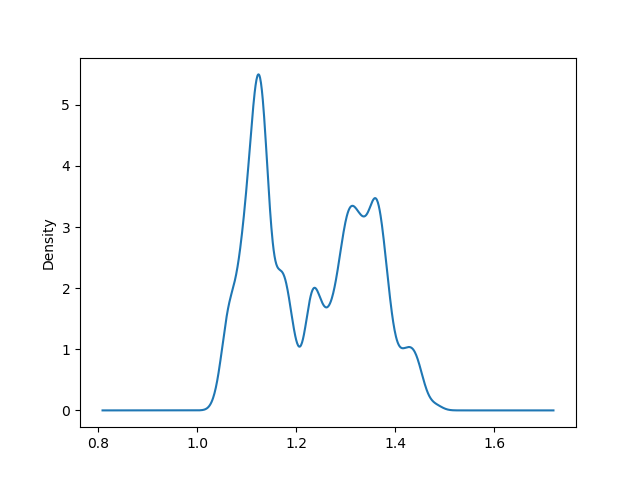

In [12]:
d['median'].plot.kde()